In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
from torchvision.utils import make_grid , save_image
from boltzman_pytorch import *
%matplotlib inline

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = RBM(k = 1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.05)
loss_fn.to(device)
model.to(device)
print(device)

cuda


In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((28, 28)),
    transforms.Grayscale()
])
handwritten_data = torchvision.datasets.ImageFolder("./data/handwrittendataset/Train/", transform)
dataloader = torch.utils.data.DataLoader(dataset=handwritten_data, batch_size = 5, shuffle = True)

In [10]:
import os
rbm = RBM(k = 4)
path = "./saved_models/rbm_nepali_characters.pth"
if os.path.exists(path):
    rbm.load_state_dict(torch.load(path))
    print("RBM model found")

RBM model found


In [ ]:
loss_boltzman = np.array([])

for epoch in range(1):
    loss_ = []
    for i, (data,target) in enumerate(dataloader):
        data = Variable(data.view(data.size()[0],784))
        sample_data = data.bernoulli()
        
        v,v1 = rbm(sample_data)
        loss = loss_fn(rbm.free_energy(v), rbm.free_energy(v1))
#         loss = rbm.free_energy(v) - rbm.free_energy(v1)
        loss_.append(loss.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print("Training loss for {} epoch: {}".format(epoch, np.mean(loss_)))
            
    print(f"Total Data = {i}")
            
    loss_boltzman = np.append(loss_boltzman, np.mean(loss_))

Training loss for 0 epoch: 49781.359375
Training loss for 0 epoch: 52686.6875


In [22]:
def show_adn_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    f = "./%s.png" % file_name
    plt.imshow(npimg)
    plt.imsave(f,npimg)

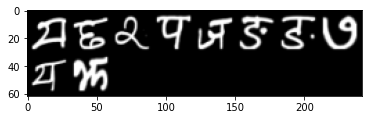

In [25]:
show_adn_save("real",make_grid(data.view(data.size()[0],1,28,28).data))

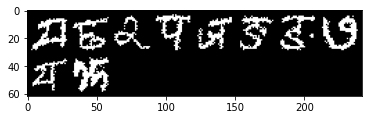

In [26]:
show_adn_save("real",make_grid(v.view(v.size()[0],1,28,28).data))

In [15]:
torch.save(rbm.state_dict(), "saved_models/rbm_nepali_characters.pth")